In [27]:
x1=Float32(1/3)
bitstring(x1)

"00111110101010101010101010101011"

In [28]:
x2=Float64(1/3)
bitstring(x2)


"0011111111010101010101010101010101010101010101010101010101010101"

In [29]:
x3=Float64(Float32(1/3))
bitstring(x3)

"0011111111010101010101010101010101100000000000000000000000000000"

In [30]:
#Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

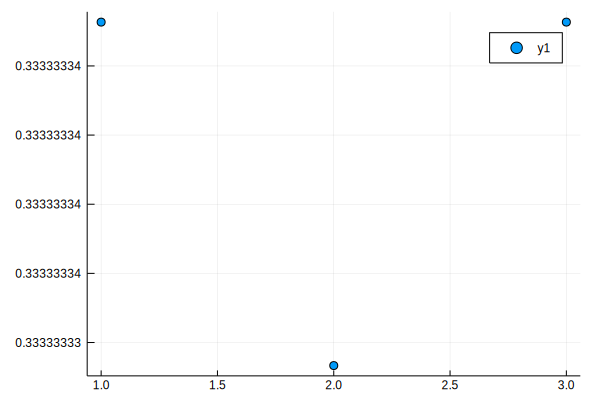

In [45]:
scatter(1:1:3, [x1,x2,x3])

In [32]:
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))


decode (generic function with 1 method)

In [33]:
c=Float32[]
a=Float32(1.0)
r=1:1000
for i=r
    push!(c, -a+nextfloat(a))
    a=a+1
end
map(x-> bitstring(x),c)

1000-element Array{String,1}:
 "00110100000000000000000000000000"
 "00110100100000000000000000000000"
 "00110100100000000000000000000000"
 "00110101000000000000000000000000"
 "00110101000000000000000000000000"
 "00110101000000000000000000000000"
 "00110101000000000000000000000000"
 "00110101100000000000000000000000"
 "00110101100000000000000000000000"
 "00110101100000000000000000000000"
 "00110101100000000000000000000000"
 "00110101100000000000000000000000"
 "00110101100000000000000000000000"
 ⋮                                 
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"
 "00111000100000000000000000000000"

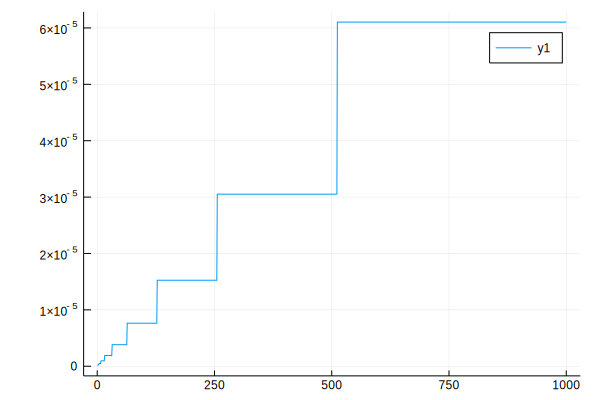

In [34]:
plot(1:1:1000, c)

In [53]:
c=Float32[]
x=Float32(1.0)
r=1:126
for i=r
    x=x/2
    x=nextfloat(x)
end
r=1:130
for i=r
    x=prevfloat(x)
    push!(c, x)
end
map(x-> decode(x),c)

130-element Array{Tuple{Char,String,String},1}:
 ('0', "00000001", "00000000000000001111101")
 ('0', "00000001", "00000000000000001111100")
 ('0', "00000001", "00000000000000001111011")
 ('0', "00000001", "00000000000000001111010")
 ('0', "00000001", "00000000000000001111001")
 ('0', "00000001", "00000000000000001111000")
 ('0', "00000001", "00000000000000001110111")
 ('0', "00000001", "00000000000000001110110")
 ('0', "00000001", "00000000000000001110101")
 ('0', "00000001", "00000000000000001110100")
 ('0', "00000001", "00000000000000001110011")
 ('0', "00000001", "00000000000000001110010")
 ('0', "00000001", "00000000000000001110001")
 ⋮                                           
 ('0', "00000001", "00000000000000000000111")
 ('0', "00000001", "00000000000000000000110")
 ('0', "00000001", "00000000000000000000101")
 ('0', "00000001", "00000000000000000000100")
 ('0', "00000001", "00000000000000000000011")
 ('0', "00000001", "00000000000000000000010")
 ('0', "00000001", "000000000000

In [36]:
include <stdio.h>
include <gsl/gsl_ieee_utils.h>
int main()
{ 
    float val = 1.0;
    for(int i = 0; i < 350; i+=3)
    {
        val /= 2; 
        gsl_ieee_printf_float(&val); 
        printf("\n\n"); 
    } 
}

LoadError: syntax: extra token "main" after end of expression

In [37]:

import math
def roots_unst(a, b, c):
    delta = b*b - 4*a*c
    math.sqrt(delta)
    return ( (-b + math.sqrt(delta))/(2*a), (-b - math.sqrt(delta))/(2*a) )
roots_unst(1,4,3)

ArgumentError: ArgumentError: Package math not found in current path:
- Run `import Pkg; Pkg.add("math")` to install the math package.


In [43]:
def root_st(a, b, c):
    delta = b*b - 4*a*c
    x1 = 0
    x2 = 0
    if b >= 0:
        x2 = (-b - sqrt(delta))/(2*a)
        x1 = c / (a * x2)
    else:
        x1 = (-b + sqrt(delta))/(2*a)
        x2 = c / (a * x1)
    
    return (x1, x2)
root_st(1,4,3)

LoadError: syntax: extra token "root_st" after end of expression

In [39]:
a = 1.000000000001
b = 400000000000000000000000.0
c = 1.000000000001

unstable = roots_unst(a, b, c)
print(unstable)

stable = root_st(a, b, c)
print(stable)

print(unstable == stable)

UndefVarError: UndefVarError: roots_unst not defined